# importing the necessary Python libraries and the dataset

In [160]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('books.csv', error_bad_lines=False)
df=df.drop(['Unnamed: 12'], axis=1)
df.head()

C:\Users\Raj Krishna Mondal\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,34889,Brown's Star Atlas: Showing All The Bright Sta...,Brown,Son & Ferguson,0,851742718,9.78E+12,eng,49,0,0,05-01-1977
1,22128,Patriots (The Coming Collapse),James Wesley,Rawles,3.63,156384155X,9.78E+12,eng,342,38,4,1/15/1999
2,16914,The Tolkien Fan's Medieval Reader,David E. Smith (Turgon of TheOneRing.net,one of the founding members of this Tolkien w...,3.58,1593600119,9.78E+12,eng,400,26,4,04-06-2004
3,12224,Streetcar Suburbs: The Process of Growth in Bo...,Sam Bass Warner,Jr./Sam B. Warner,3.58,674842111,9.78E+12,en-US,236,61,6,4/20/2004
4,2034,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,Aristophanes/F.W. Hall/W.M. Geldart,5,198145047,9.78E+12,grc,364,0,0,2/22/1922,Oxford University Press USA


# Data Exploration

In [14]:
df.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   bookID              11127 non-null  int64 
 1   title               11127 non-null  object
 2   authors             11127 non-null  object
 3   average_rating      11127 non-null  object
 4   isbn                11127 non-null  object
 5   isbn13              11127 non-null  object
 6   language_code       11127 non-null  object
 7     num_pages         11127 non-null  object
 8   ratings_count       11127 non-null  int64 
 9   text_reviews_count  11127 non-null  int64 
 10  publication_date    11127 non-null  object
 11  publisher           11127 non-null  object
dtypes: int64(3), object(9)
memory usage: 1.0+ MB


In [15]:
df.describe()

,bookID,ratings_count,text_reviews_count
count,11127.000000,1.112700e+04,11127.000000
mean,21310.938887,1.793649e+04,541.864474
std,13093.358023,1.124794e+05,2576.174610
min,1.000000,0.000000e+00,0.000000
25%,10287.000000,1.040000e+02,9.000000
50%,20287.000000,7.450000e+02,47.000000
75%,32104.500000,4.993500e+03,237.500000
max,45641.000000,4.597666e+06,94265.000000


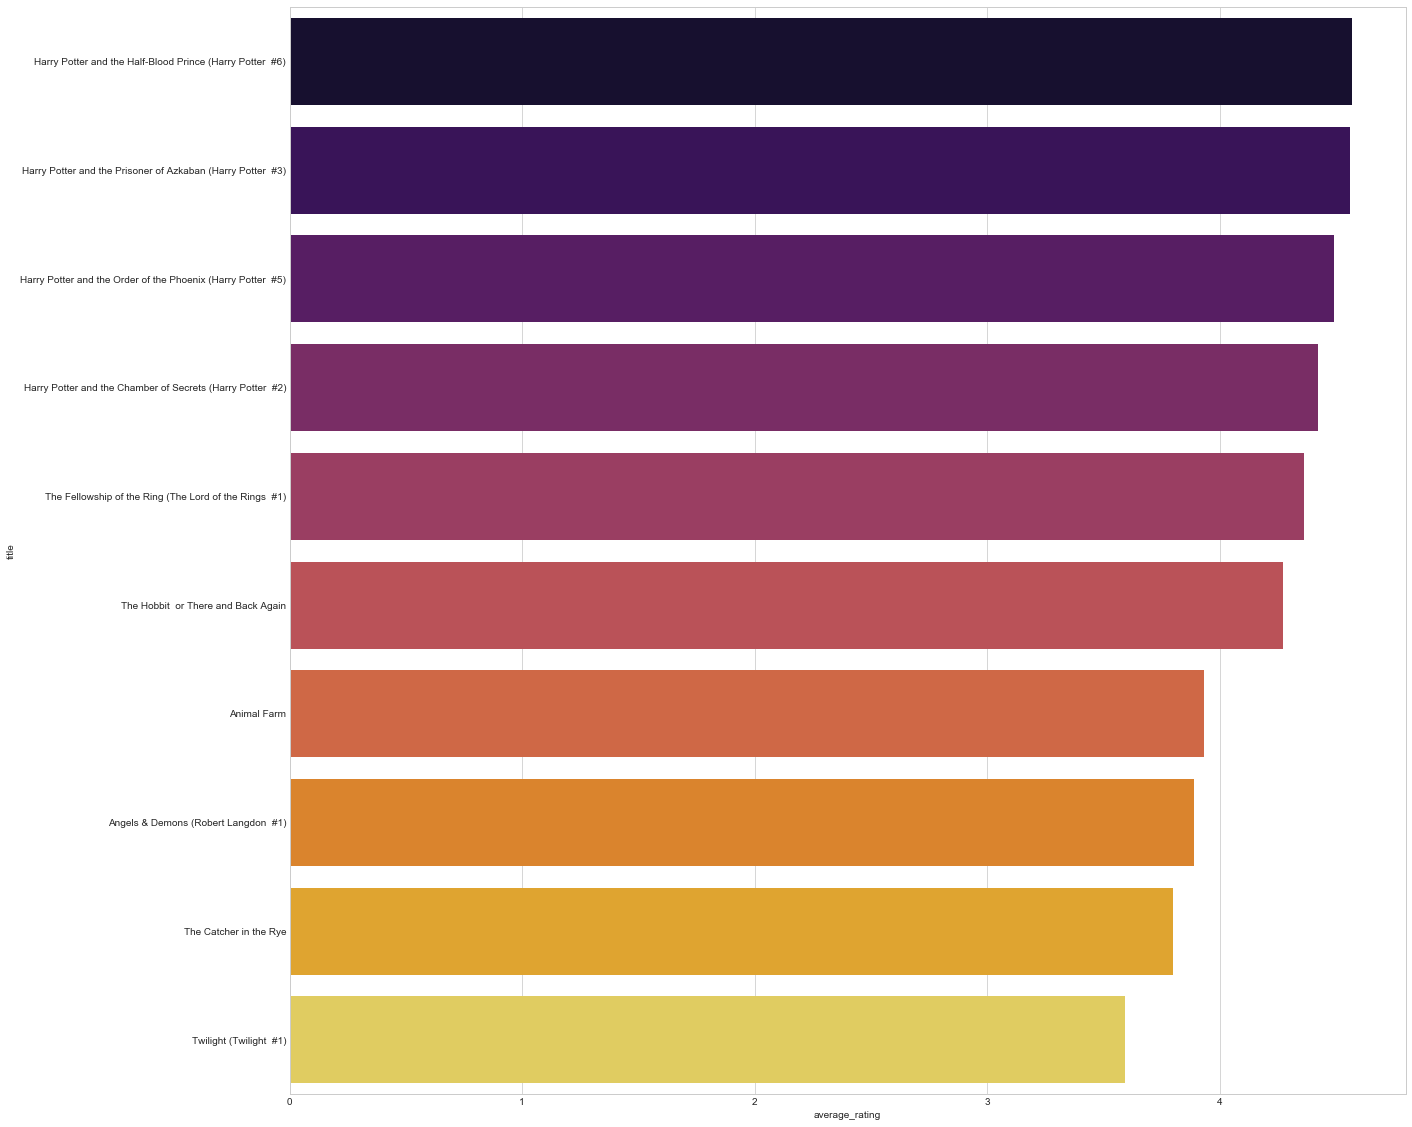

In [21]:
top_ten=df[df['ratings_count']>1000000]
top_ten=top_ten.sort_values(by='ratings_count', ascending=False).head(10)
top_ten_rating=top_ten.sort_values(by='average_rating', ascending=False)

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,20))
sns.barplot(x="average_rating", y="title", data=top_ten_rating, palette='inferno')

In [7]:
book_aut=df.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('authors')
book_aut

,title
authors,
P.G. Wodehouse,40
Stephen King,40
Rumiko Takahashi,39
Orson Scott Card,35
Agatha Christie,33
Piers Anthony,30
Mercedes Lackey,29
Sandra Brown,29
Dick Francis,28


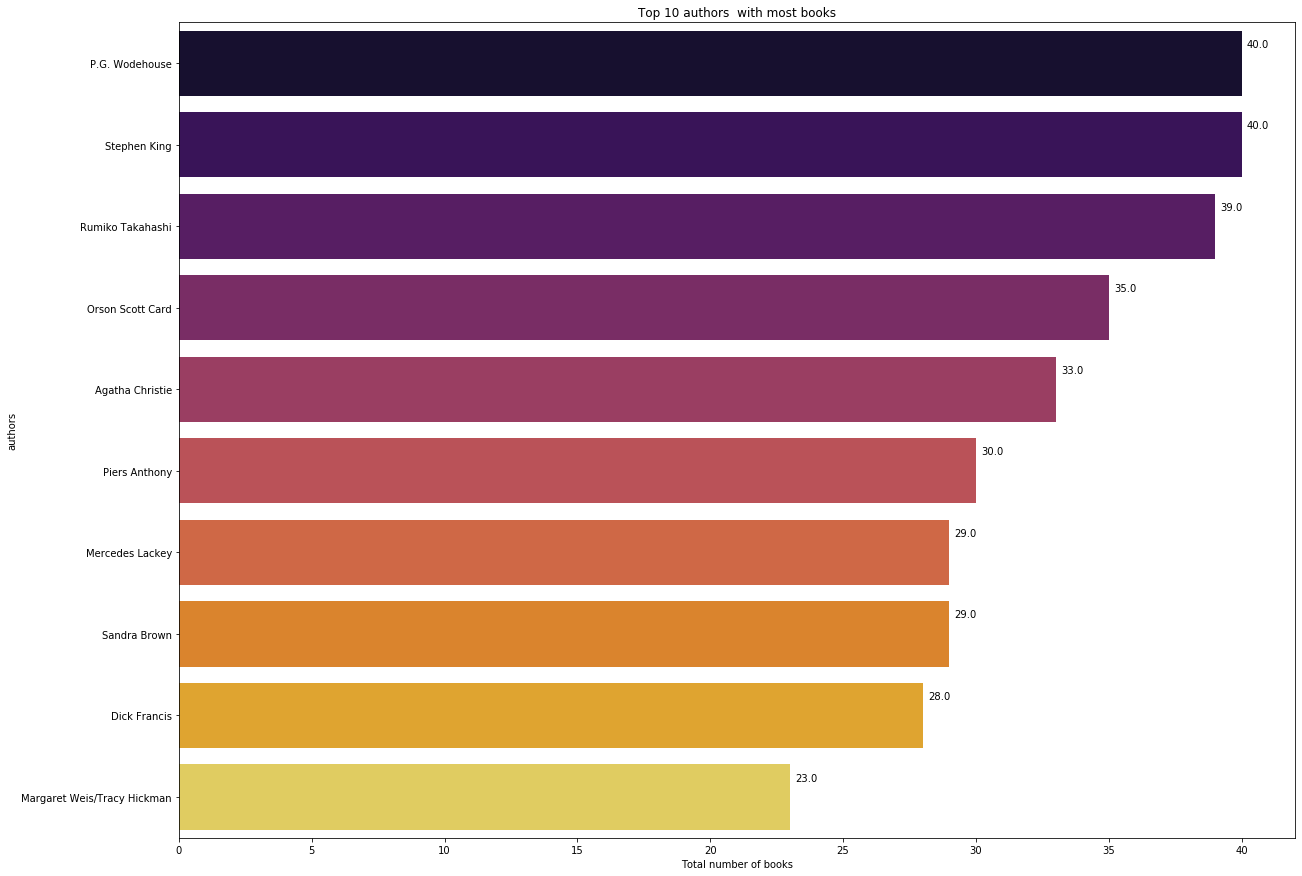

In [6]:
plt.figure(figsize=(20,15))
ax=sns.barplot(book_aut['title'], book_aut.index, palette='inferno')
ax.set_title("Top 10 authors  with most books")
ax.set_xlabel("Total number of books")

total=[]

for i in ax.patches:
    total.append(i.get_width())
    
totals=sum(total)

for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2, str(round(i.get_width())))

plt.show()

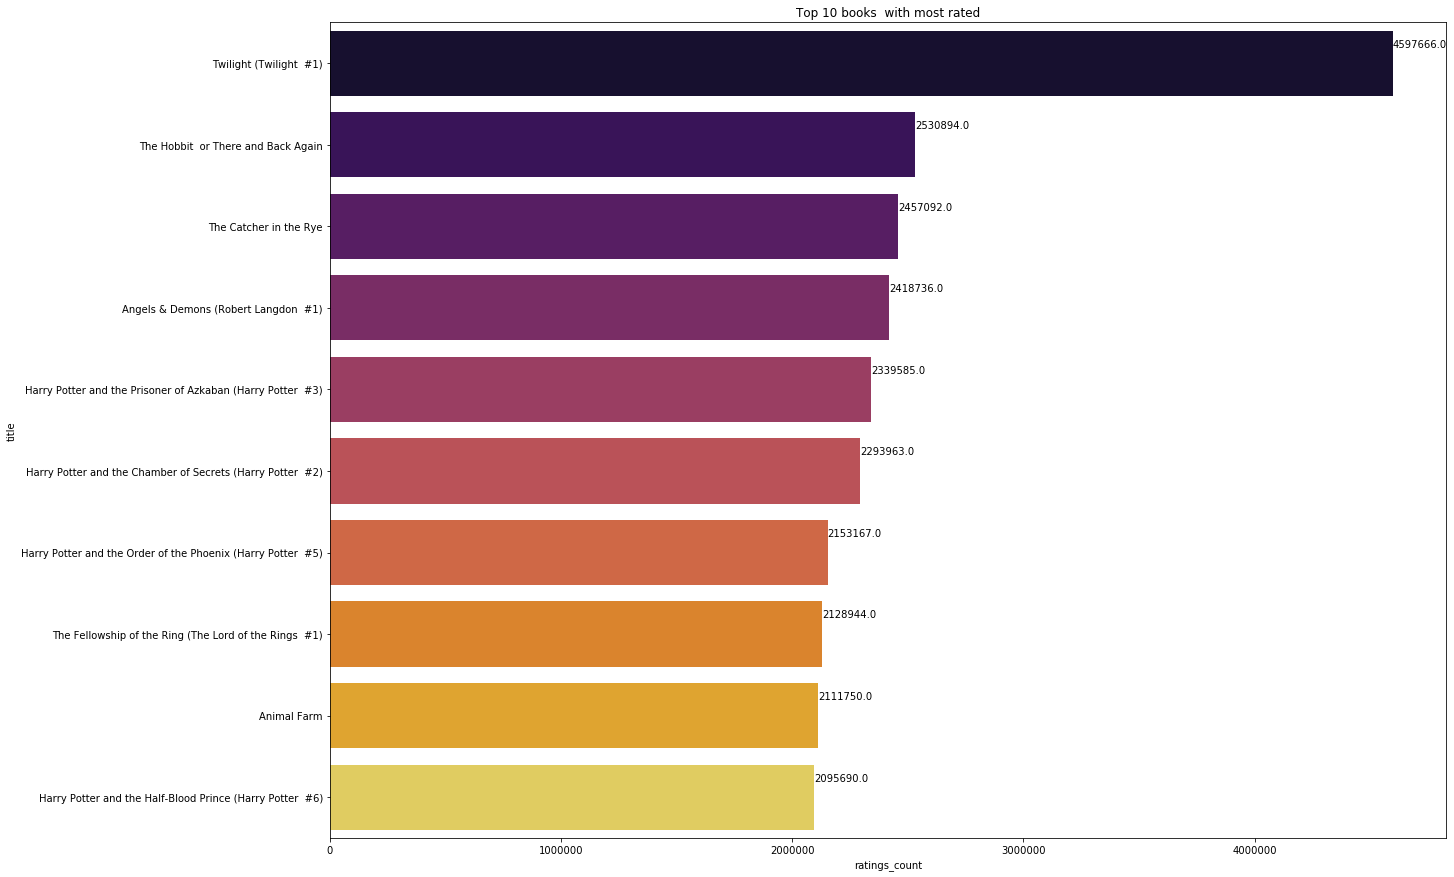

In [16]:
plt.figure(figsize=(20,15))

ax=sns.barplot(most_rated['ratings_count'], most_rated.index, palette='inferno')
ax.set_title("Top 10 books  with most rated")


total=[]

for i in ax.patches:
    total.append(i.get_width())
    
totals=sum(total)

for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2, str(round(i.get_width())))

plt.show()

In [110]:
df=df.sort_values('average_rating').reset_index()
df=df.iloc[4:]
df

,index,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
4,4242,15186,American Film Guide,Frank N. Magill,0,893562505,9.78E+12,eng,5,0,0,01-01-1983,Salem Press Inc
5,375,1302,Juiced Official Strategy Guide,Doug Walsh,0,744005612,9.78E+12,eng,112,0,0,06-01-2005,BradyGames
6,4678,16806,The Man and the Author: John Milton: Twentieth...,J. Martin Evans,0,415940478,9.78E+12,eng,386,0,0,11-08-2002,Routledge
7,7637,29404,Your Child and Jesus: A Family Activity Book,Rick Osborne/Kevin Miller,0,080242855X,9.78E+12,eng,112,0,0,9/13/1999,Moody Publishers
8,2533,9338,Insights: Talks On The Nature Of Existence,Frederick P. Lenz,0,1932206086,9.78E+12,eng,304,0,0,01-01-2003,Frederick P. Lenz Foundation for American Budd...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11122,10266,41639,Bill Gates: Computer Legend (Famous Lives),Sara Barton-Wood,5,739844326,9.78E+12,eng,48,0,0,11-01-2001,Raintree
11123,6778,25426,Delwau Duon: Peintiadau Nicholas Evans = Symph...,Nicholas Evans/Rhonda Evans,5,862431352,9.78E+12,wel,150,1,0,6/22/1987,Y Lolfa
11124,8547,32823,Fanning the Flame: Bible Cross and Mission,Chris Green/Chris Wright/Paul Douglas Gardner,5,310249872,9.78E+12,eng,336,1,1,6/17/2003,Zondervan
11125,9897,39829,His Princess Devotional: A Royal Encounter Wit...,Sheri Rose Shepherd,5,1590529626,9.78E+12,eng,240,2,0,10/16/2007,Multnomah


Text(0.5, 0, 'average rating')

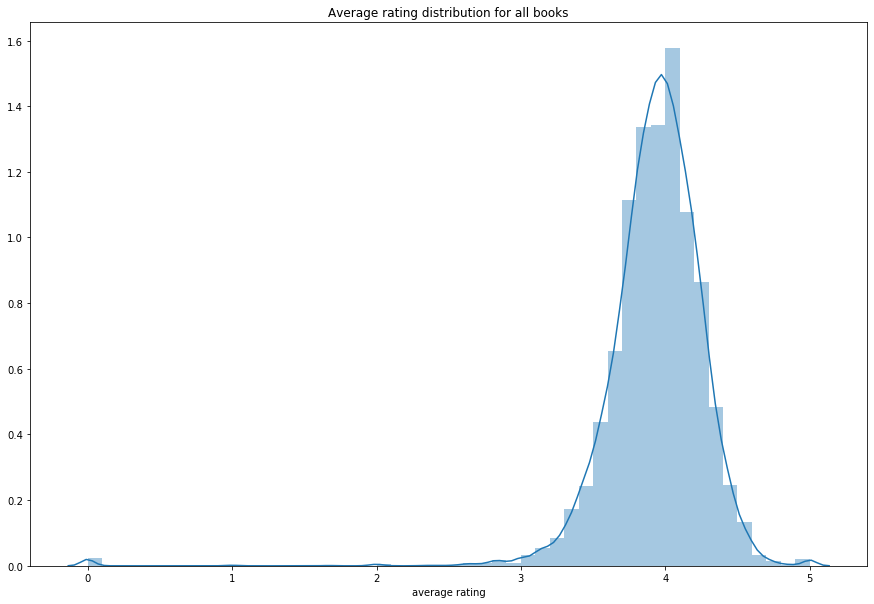

In [111]:
df.average_rating=df.average_rating.astype(float)
fig, ax= plt.subplots(figsize=[15,10])

sns.distplot(df['average_rating'], ax=ax)
ax.set_title('Average rating distribution for all books')
ax.set_xlabel('average rating')

In [130]:
df.tail(50)

,index,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
11077,9789,39201,Getting a Grip on the Basics: Building a Firm ...,Beth A. Jones,4.67,1577948262,9.78E+12,eng,124,9,0,05-01-2006,Harrison House
11078,3510,12789,Falling Angels (Luc Actar #1),Melissa M. Garcia,4.67,595377106,9.78E+12,eng,216,1,0,2/14/2006,iUniverse
11079,7045,26805,The Sibley Field Guide to Birds of Western Nor...,David Allen Sibley,4.69,679451218,9.78E+12,en-US,473,730,36,4/29/2003,Alfred A. Knopf
11080,6594,24818,The Days Are Just Packed,Bill Watterson,4.69,836217357,9.78E+12,eng,176,20308,244,09-01-1993,Andrews McMeel Publishing
11081,8365,32160,Cook's Illustrated 2003 (Cook's Illustrated An...,Cook's Illustrated Magazine,4.69,936184728,9.78E+12,eng,212,26,0,11/15/2003,Boston Common Press
11082,8186,31401,A Wife After God's Own Heart Growth and Study ...,Elizabeth George,4.69,736911685,9.78E+12,eng,160,9,1,01-01-2004,Harvest House Publishers
11083,10941,44826,The Price of the Ticket: Collected Nonfiction ...,James Baldwin,4.70,312643063,9.78E+12,eng,712,404,30,9/15/1985,St. Martin's Press
11084,306,955,The 5 Love Languages / The 5 Love Languages Jo...,Gary Chapman,4.70,802415318,9.78E+12,eng,0,22,4,01-01-2005,Moody Publishers
11085,6500,24520,The Complete Aubrey/Maturin Novels (5 Volumes),Patrick O'Brian,4.70,039306011X,9.78E+12,eng,6576,1338,81,10/17/2004,W. W. Norton Company
11086,5616,20749,Study Bible: NIV,Anonymous,4.70,310929555,9.78E+12,eng,2198,4166,186,10-01-2002,Zondervan Publishing House


<Figure size 1440x1440 with 0 Axes>

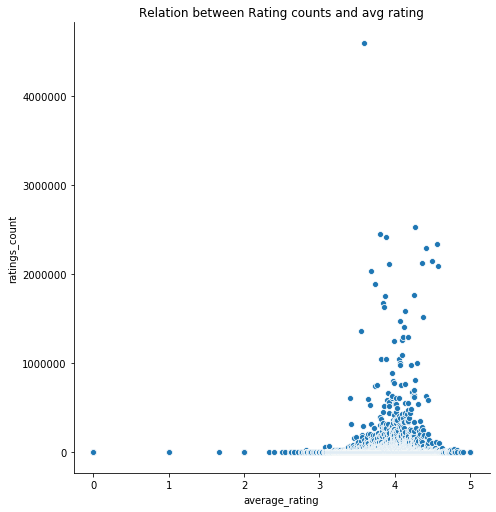

In [122]:
plt.figure(figsize=(20,20))
ax=sns.relplot(data=df, x="average_rating", y="ratings_count",sizes=(400,200), height=7)
plt.title('Relation between Rating counts and avg rating')
ax.set_axis_labels("average_rating", "ratings_count")

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   bookID              11127 non-null  int64 
 1   title               11127 non-null  object
 2   authors             11127 non-null  object
 3   average_rating      11127 non-null  object
 4   isbn                11127 non-null  object
 5   isbn13              11127 non-null  object
 6   language_code       11127 non-null  object
 7   num_pages           11127 non-null  object
 8   ratings_count       11127 non-null  int64 
 9   text_reviews_count  11127 non-null  int64 
 10  publication_date    11127 non-null  object
 11  publisher           11127 non-null  object
dtypes: int64(3), object(9)
memory usage: 1.0+ MB


In [161]:
df=df.sort_values('num_pages', ascending=False).reset_index()
df=df.iloc[4:]
df.head(20)

,index,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
4,6490,11511,L'Échiquier du mal,Dan Simmons,3.9,2207254410,9.78E+12,fre,999,63,7,06-08-2003,Denoël
5,10466,27847,Data Structures and Abstractions with Java,Frank M. Carrano/Walter J. Savitch,3.47,013237045X,9.78E+12,eng,998,34,3,08-04-2006,Prentice Hall
6,5073,28898,Fundamentals of Heat and Mass Transfer [with I...,Frank P. Incropera/David P. DeWitt,3.99,470055545,9.78E+12,en-US,997,6,0,10/30/2006,Wiley
7,4499,16619,Democracy in America,Alexis de Tocqueville/Isaac Kramnick/Gerald Bevan,4.02,140447601,9.78E+12,eng,992,18925,523,4/24/2003,Penguin Classics
8,7256,11525,1 000 Places to See Before You Die,Patricia Schultz,3.85,761104844,9.78E+12,eng,992,36303,439,5/22/2003,Workman Publishing Company
9,837,28389,Marcel Proust: A Life,William C. Carter,4.33,300094000,9.78E+12,eng,992,14,4,02-08-2002,Yale University Press
10,438,19809,The Last Lion: Winston Spencer Churchill: Visi...,William Manchester,4.42,385313489,9.78E+12,eng,992,9659,467,04-01-1984,Delta
11,437,19808,The Last Lion: Winston Spencer Churchill: Visi...,William Manchester,4.42,316545031,9.78E+12,en-US,992,335,38,5/30/1983,Little Brown & Company
12,4039,19670,Debt of Honor (Jack Ryan #7),Tom Clancy,4.05,425147584,9.78E+12,eng,990,39521,469,08-01-1995,Berkley Books
13,9425,24978,Inside Job,Connie Willis,3.67,1596060247,9.78E+12,eng,99,1442,180,06-01-2005,Subterranean Press


In [165]:

df.num_pages=df.num_pages.astype(float)

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 4 to 11126
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               11123 non-null  int64  
 1   bookID              11123 non-null  int64  
 2   title               11123 non-null  object 
 3   authors             11123 non-null  object 
 4   average_rating      11123 non-null  float64
 5   isbn                11123 non-null  object 
 6   isbn13              11123 non-null  object 
 7   language_code       11123 non-null  object 
 8   num_pages           11123 non-null  float64
 9   ratings_count       11123 non-null  int64  
 10  text_reviews_count  11123 non-null  int64  
 11  publication_date    11123 non-null  object 
 12  publisher           11123 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 1.1+ MB


<Figure size 1440x1440 with 0 Axes>

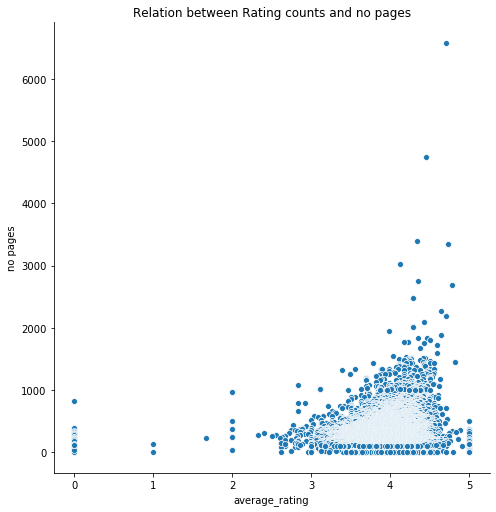

In [167]:
plt.figure(figsize=(20,20))
ax=sns.relplot( x="average_rating", y="num_pages",data=df,sizes=(400,200), height=7)
plt.title('Relation between Rating counts and no pages')
ax.set_axis_labels("average_rating", "no pages")

# Data Preparation

In [168]:
df2=df.copy()

In [173]:
df2.loc[(df2['average_rating']>=0)&(df2['average_rating']<=1),'rating between']="between 0 and 1"
df2.loc[(df2['average_rating']>1)&(df2['average_rating']<=2),'rating between']="between 1 and 2"
df2.loc[(df2['average_rating']>2)&(df2['average_rating']<=3),'rating between']="between 2 and 3"
df2.loc[(df2['average_rating']>3)&(df2['average_rating']<=4),'rating between']="between 3 and 4"
df2.loc[(df2['average_rating']>4)&(df2['average_rating']<=5),'rating between']="between 4 and 5"

In [174]:
df2.sort_values('average_rating')

,index,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,rating between
8029,11105,9337,How To Meditate: An Anthology Of Talks On Medi...,Frederick P. Lenz,0.0,1932206108,9.78E+12,eng,228.0,0,0,01-01-2004,Frederick P. Lenz Foundation for American Budd...,between 0 and 1
10480,11114,25841,The Road To War 1933 39,Andrew Hunt,0.0,340774770,9.78E+12,eng,128.0,0,0,04-01-2000,Hodder & Stoughton Educational Division,between 0 and 1
9625,11124,42758,The Fantastic Vampire: Studies in the Children...,James Craig Holte,0.0,313309337,9.78E+12,eng,176.0,0,0,3/30/2002,Greenwood Press,between 0 and 1
5128,11116,27416,Mythographi Graeci 1: Apollodori Bibliotheca ...,Apollodorus/Richard Wagner,0.0,3598715439,9.78E+12,grc,335.0,0,0,7/15/1998,K.G. Saur Verlag,between 0 and 1
8528,11118,29091,The Berlin Phenomenology,Georg Wilhelm Friedrich Hegel/Michael John Petry,0.0,9027712050,9.79E+12,eng,210.0,0,0,5/31/1981,Springer,between 0 and 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10502,8,14741,Zone of the Enders: The 2nd Runner Official St...,Tim Bogenn,5.0,744002354,9.78E+12,eng,128.0,2,0,03-06-2003,BradyGames,between 4 and 5
1600,17,23552,The New Big Book of America,Todd Davis/Marc Frey,5.0,762412631,9.78E+12,eng,56.0,2,1,3/21/2002,Courage Books,between 4 and 5
8809,10,17830,Bulgakov's the Master and Margarita: The Text ...,Elena N. Mahlow,5.0,533017424,9.78E+12,eng,202.0,4,0,01-01-1975,Vantage Press,between 4 and 5
8882,13,19788,The Goon Show Volume 11: He's Fallen in the W...,NOT A BOOK,5.0,563388323,9.78E+12,eng,2.0,2,0,10-02-1995,BBC Physical Audio,between 4 and 5


In [175]:
rating_df=pd.get_dummies(df2['rating between'])
language_df=pd.get_dummies(df2['language_code'])

In [177]:
language_df

,ale,ara,en-CA,en-GB,en-US,eng,enm,fre,ger,gla,...,nl,nor,por,rus,spa,srp,swe,tur,wel,zho
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11122,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11123,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11124,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11125,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [178]:
feature=pd.concat([rating_df, language_df, df2['average_rating'], df2['ratings_count']], axis=1)

In [179]:
feature 

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5,ale,ara,en-CA,en-GB,en-US,...,por,rus,spa,srp,swe,tur,wel,zho,average_rating,ratings_count
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.90,63
5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.47,34
6,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,3.99,6
7,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.02,18925
8,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.85,36303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11122,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.00,7
11123,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.84,91
11124,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.51,42
11125,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.89,2


# Building Book Recommendation System

In [180]:
from sklearn.preprocessing import MinMaxScaler

minmax=MinMaxScaler()

feature=minmax.fit_transform(feature)

In [181]:
feature

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.80000000e-01, 1.37026048e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 6.94000000e-01, 7.39505654e-06],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.98000000e-01, 1.30500998e-06],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.02000000e-01, 9.13506984e-06],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.78000000e-01, 4.35003326e-07],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.58000000e-01, 2.19676679e-05]])

In [190]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split

model=neighbors.NearestNeighbors(n_neighbors=8, algorithm='ball_tree')

model.fit(feature)

dist, idlist=model.kneighbors(feature)

In [191]:
dist

array([[0.00000000e+00, 2.82752162e-06, 3.11027378e-05, ...,
        2.00015369e-03, 4.00000766e-03, 4.00001420e-03],
       [0.00000000e+00, 4.35003326e-07, 2.17501663e-06, ...,
        4.13253159e-06, 5.22003991e-06, 6.52504988e-06],
       [0.00000000e+00, 8.70006651e-07, 1.52251164e-06, ...,
        1.26150964e-05, 2.74052095e-05, 2.97977278e-05],
       ...,
       [0.00000000e+00, 1.74001330e-06, 2.61001995e-06, ...,
        8.48256485e-06, 1.10925848e-05, 2.02276546e-05],
       [0.00000000e+00, 2.17501663e-07, 4.35003326e-07, ...,
        1.52251164e-06, 2.61001995e-06, 3.26252494e-06],
       [0.00000000e+00, 1.30500998e-06, 5.22003991e-06, ...,
        9.57007316e-06, 1.06575815e-05, 1.39201064e-05]])

In [193]:
idlist

array([[    0,  5496,  7404, ...,  2732,  6643,  4303],
       [    1,  7083,  7079, ..., 10608,  9444, 10956],
       [    2,  1235,  8600, ...,  3897,   383,   981],
       ...,
       [11120,  5995,  1469, ...,  1177,  9113, 10707],
       [11121,  4798,  1087, ...,  8126,   520,  8430],
       [11122, 11094,  4586, ...,  2923,  9918,  6568]], dtype=int64)

In [192]:
def bookRecom(name):
    book_list=[]
    book_id=df2[df2['title']==name].index
    book_id=book_id[0]
    for new in idlist[book_id]:
        book_list.append(df2.loc[new].title)
    return book_list

Book_name=bookRecom('Harry Potter and the Half-Blood Prince (Harry Potter  #6)')
Book_name

['Harry Potter and the Half-Blood Prince (Harry Potter  #6)',
 'The Lion  the Witch and the Wardrobe (Chronicles of Narnia #2)',
 'American Legal History: Cases and Materials',
 'The Lion  the Witch and the Wardrobe (Narnia)',
 'Malinche',
 'Love Mode  Vol. 3',
 'The Body in the Library (Miss Marple  #3)',
 'When Rain Clouds Gather']